### Mushroom classification
- learning method: supervised learning, classification
- learning algorithm: decision-tree, logistic regression, ensemble voting
- datasets: mushrooms.csv
- 
- if I do, regression survivered rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
file_path = '../data/mushrooms.csv'
mushroom_df = pd.read_csv(file_path)

- class: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [4]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mushroom_df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [6]:
mushroom_df['stalk-root'].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

In [7]:
mask = mushroom_df['stalk-root'] == '?'
mushroom_df.loc[mask, 'class'].value_counts()

class
p    1760
e     720
Name: count, dtype: int64

- 저걸 날려야 하나.. 말아야 하나...

In [8]:
label_encode = pd.DataFrame(columns=mushroom_df.columns)
label_encode

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [9]:
for col in label_encode.columns:
    names = mushroom_df[col].unique().tolist() 
    mapping = {name:idx for idx, name in enumerate(names)}  # dict comprehension
    label_encode[col] = mushroom_df[col].map(mapping)

In [10]:
label_encode.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [11]:
import seaborn as sns

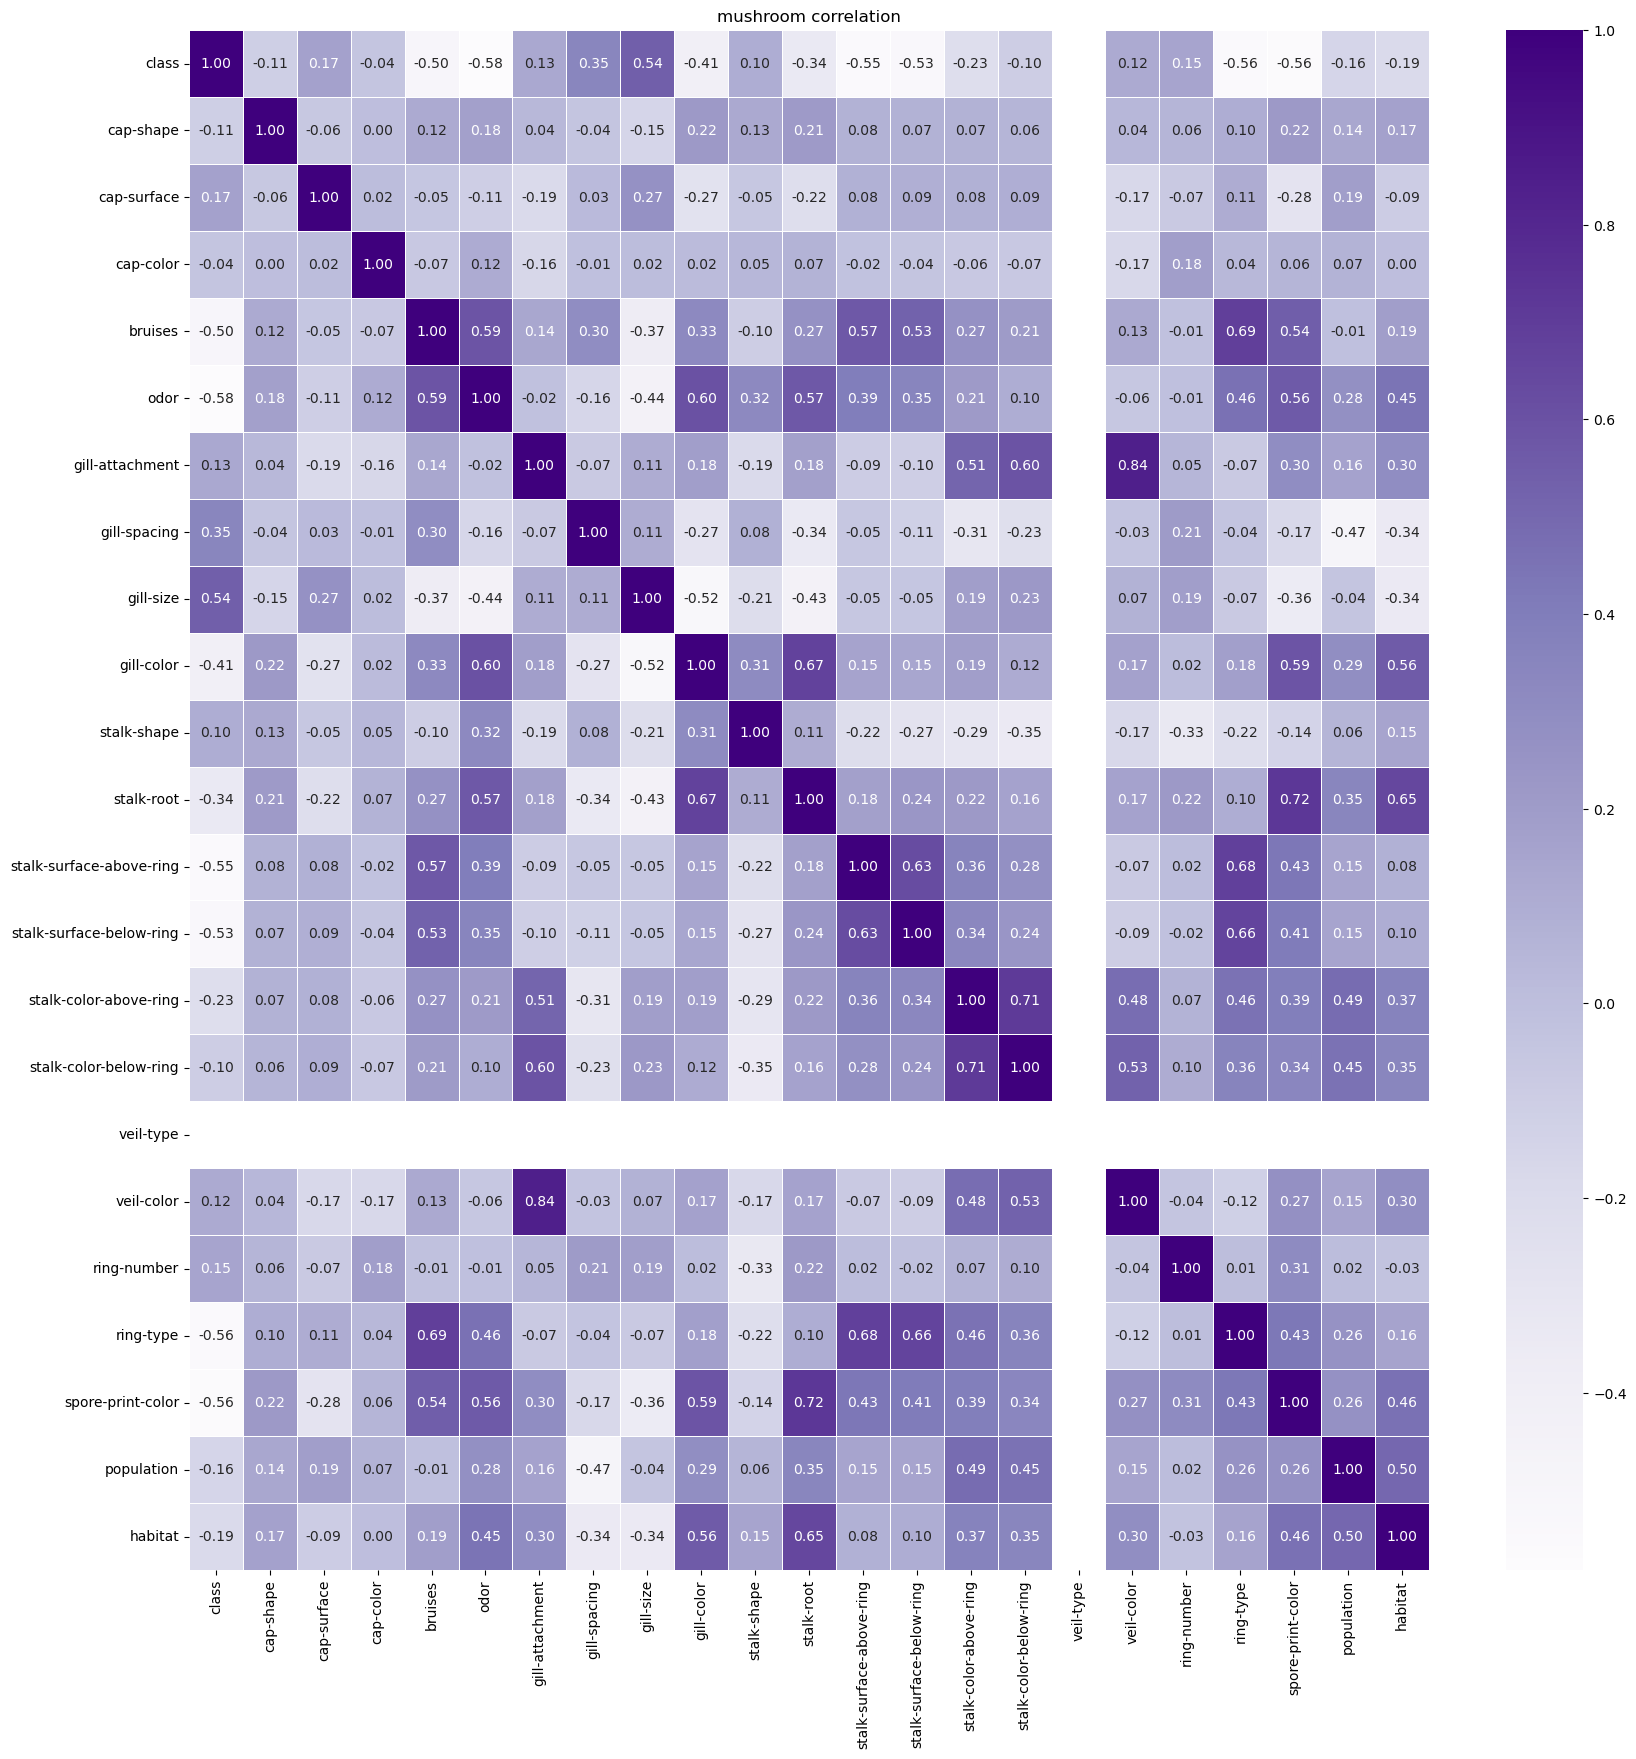

In [12]:
corr_mushroom = label_encode.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_mushroom, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title('mushroom correlation')
plt.show()

In [13]:
label_encode['veil-type'].value_counts()

veil-type
0    8124
Name: count, dtype: int64

In [14]:
label = label_encode['class']
feature = label_encode.drop(columns=['class'])

print(f"feature: {feature.shape}, {feature.ndim}D")
print(f"label: {label.shape}, {label.ndim}D")

feature: (8124, 22), 2D
label: (8124,), 1D


In [15]:
# train : test = 70 : 30
# statify : ne_label
# random_state: 14

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=14, stratify=label)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D\n")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D\n")
print(f"train test ratio: {len(X_train)/len(feature)*100:.2f} %, {len(X_test)/len(feature)*100:.2f} %")

X train: (5686, 22), 2D
y train: (5686,), 1D

X test: (2438, 22), 2D
y test: (2438,), 1D

train test ratio: 69.99 %, 30.01 %


- encoding decision tree classifier
    - label: class
    - feature: exclusion class and all columns
    - hyperparameter: default

In [16]:
# model instance
# hyperparameter: default
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
dtc_train_score = dtc.score(X_train, y_train)
dtc_test_score = dtc.score(X_test, y_test)

print(f"train score: {dtc_train_score*100:.2f} %")
print(f"test score: {dtc_test_score*100:.2f} %")

train score: 100.00 %
test score: 100.00 %


In [18]:
import graphviz
from sklearn.tree import export_graphviz

In [19]:
mushroom_df['class'].unique()

array(['p', 'e'], dtype=object)

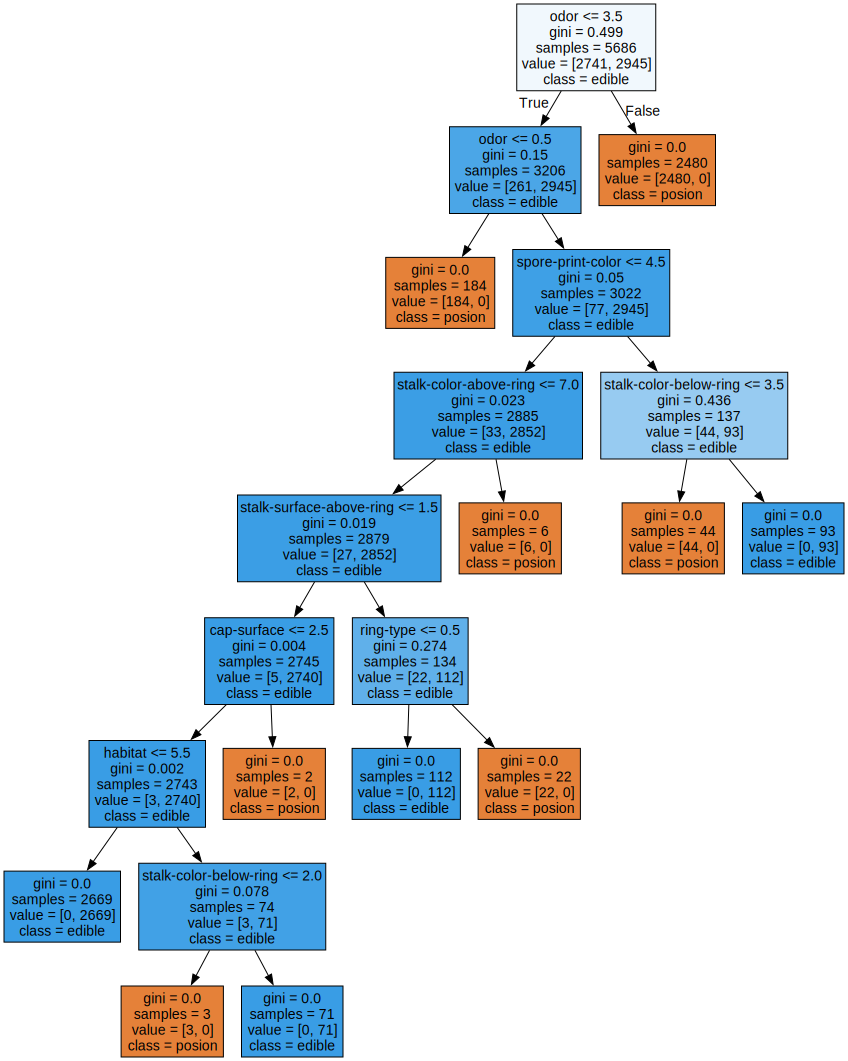

In [20]:
export_graphviz(dtc, out_file='../data/mushroom_tree.dot', class_names=['posion', 'edible'],
                feature_names=dtc.feature_names_in_, impurity=True, filled=True)

with open('../data/mushroom_tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

- 그림을 그려보니 너무 구데기라서 최적의 dtc를 찾아보기로 결정

In [21]:
dtc_params = {'max_depth':[8, 6, 4, 2], 'min_samples_split':[8, 6, 4, 2]}

In [22]:
dtc_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=dtc_params, cv=5, refit=True, return_train_score=True)
dtc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 6, 4, 2],
                         'min_samples_split': [8, 6, 4, 2]},
             return_train_score=True)

In [23]:
# model parameter
best_dtc = dtc_grid.best_estimator_
print(f"best_params_: {dtc_grid.best_params_}")
print(f"bets_score_: {dtc_grid.best_score_}")
print(f"best_estimator_: {dtc_grid.best_estimator_}")

best_params_: {'max_depth': 8, 'min_samples_split': 8}
bets_score_: 1.0
best_estimator_: DecisionTreeClassifier(max_depth=8, min_samples_split=8)


In [24]:
dtc_result = dtc_grid.cv_results_
dtc_result_df = pd.DataFrame(dtc_result)
dtc_result_df[['mean_train_score', 'mean_test_score', 'rank_test_score']]


,mean_train_score,mean_test_score,rank_test_score
0,1.000000,1.000000,1
1,1.000000,1.000000,1
2,1.000000,1.000000,1
3,1.000000,1.000000,1
4,0.998725,0.998593,5
5,0.998725,0.998593,5
6,0.998725,0.998593,5
7,0.998725,0.998593,5
8,0.994416,0.994372,9
9,0.994416,0.994372,9


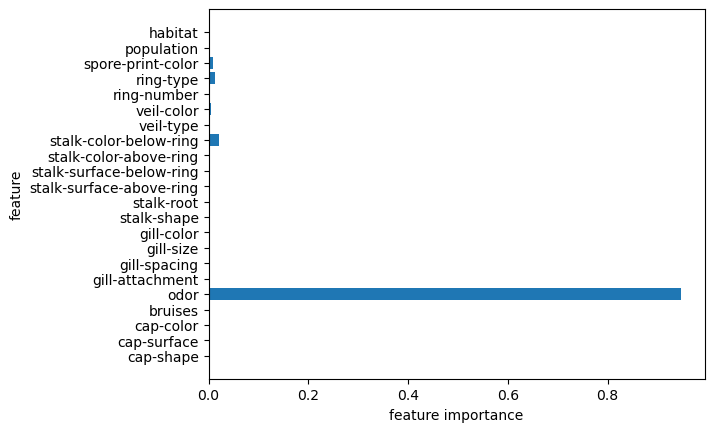

In [25]:
plt.barh(range(best_dtc.n_features_in_), best_dtc.feature_importances_, align='center')
plt.yticks(np.arange(best_dtc.n_features_in_), best_dtc.feature_names_in_)
plt.xlabel("feature importance")
plt.ylabel("feature")
plt.show()

- odor, spore-print-color, ring-number, stalk-root, stalk-color-above-ring 영향력이 있다고 나옴

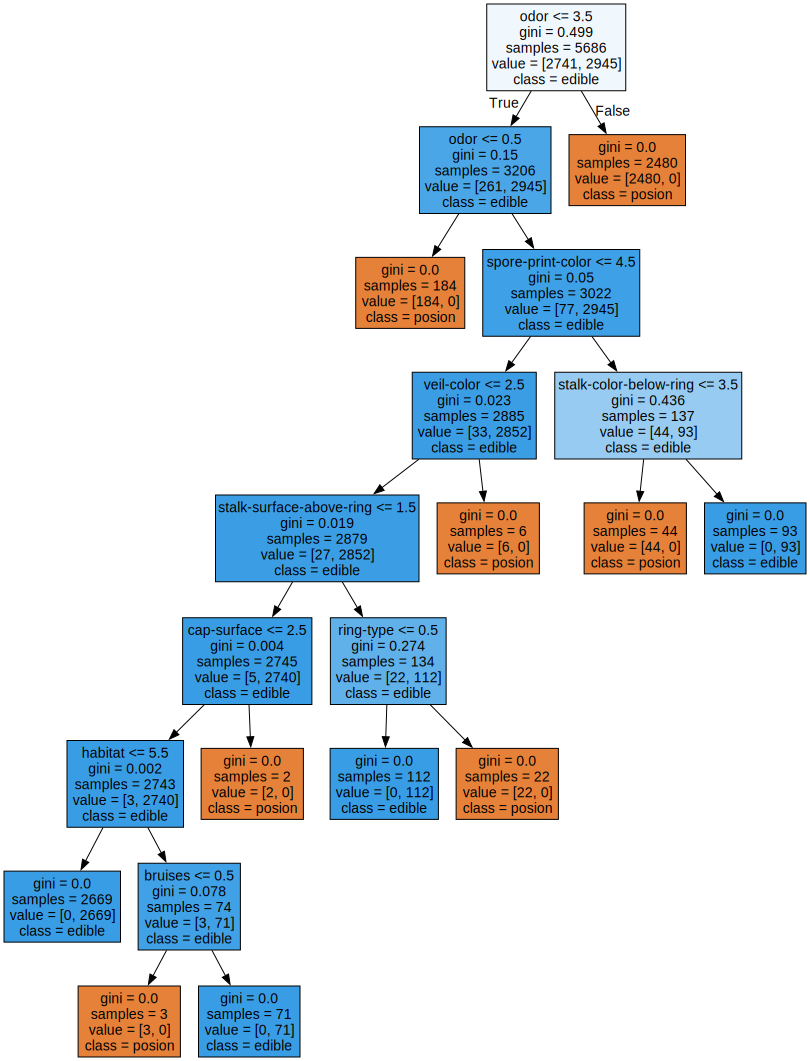

In [26]:
export_graphviz(best_dtc, out_file='../data/best_mushroom_tree.dot', class_names=['posion', 'edible'],
                feature_names=best_dtc.feature_names_in_, impurity=True, filled=True)

with open('../data/best_mushroom_tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

- feature를 바꿔서 진행 ㄱㄱ

In [27]:
mushroom_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [28]:
best_feature = label_encode[['odor', 'spore-print-color', 'ring-number', 'stalk-root', 'stalk-color-above-ring']]

In [29]:
best_feature

,odor,spore-print-color,ring-number,stalk-root,stalk-color-above-ring
0,0,0,0,0,0
1,1,1,0,1,0
2,2,1,0,1,0
3,0,0,0,0,0
4,3,1,0,0,0
...,...,...,...,...,...
8119,3,8,0,4,6
8120,3,8,0,4,6
8121,3,8,0,4,6
8122,6,4,0,4,0


In [30]:
# train : test = 7 : 3
# stratify = label
# random_state = 14

best_X_train, best_X_test, y_train, y_test = train_test_split(best_feature, label, stratify=label, random_state=14, test_size=0.3)

print(f"X train: {best_X_train.shape}, {best_X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D\n")
print(f"X test: {best_X_test.shape}, {best_X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D\n")
print(f"train test ratio: {len(best_X_train)/len(best_feature)*100:.2f} %, {len(best_X_test)/len(best_feature)*100:.2f} %")

X train: (5686, 5), 2D
y train: (5686,), 1D

X test: (2438, 5), 2D
y test: (2438,), 1D

train test ratio: 69.99 %, 30.01 %


In [31]:
# dtc_params: {'max_depth':[6, 4, 2], 'min_samples_split':[8, 6, 4, 2]}
# cv: 5

dtc_params = {'max_depth':[6, 4, 2], 'min_samples_split':[8, 6, 4, 2]}
dtc_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=dtc_params, cv=5, refit=True, return_train_score=True)
dtc_grid.fit(best_X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 4, 2],
                         'min_samples_split': [8, 6, 4, 2]},
             return_train_score=True)

In [32]:
# model parameter
best_dtc = dtc_grid.best_estimator_
best_dtc_params = dtc_grid.best_params_
print(f"best_params_: {dtc_grid.best_params_}")
print(f"bets_score_: {dtc_grid.best_score_}")
print(f"best_estimator_: {dtc_grid.best_estimator_}")

best_params_: {'max_depth': 4, 'min_samples_split': 8}
bets_score_: 0.9952512779135425
best_estimator_: DecisionTreeClassifier(max_depth=4, min_samples_split=8)


In [33]:
dtc_result = dtc_grid.cv_results_
dtc_result_df = pd.DataFrame(dtc_result)
dtc_result_df[['mean_train_score', 'mean_test_score', 'rank_test_score']]

,mean_train_score,mean_test_score,rank_test_score
0,0.995295,0.993844,5
1,0.995295,0.993844,5
2,0.995295,0.993844,5
3,0.995295,0.993844,5
4,0.995251,0.995251,1
5,0.995251,0.995251,1
6,0.995251,0.995251,1
7,0.995251,0.995251,1
8,0.986458,0.986458,9
9,0.986458,0.986458,9


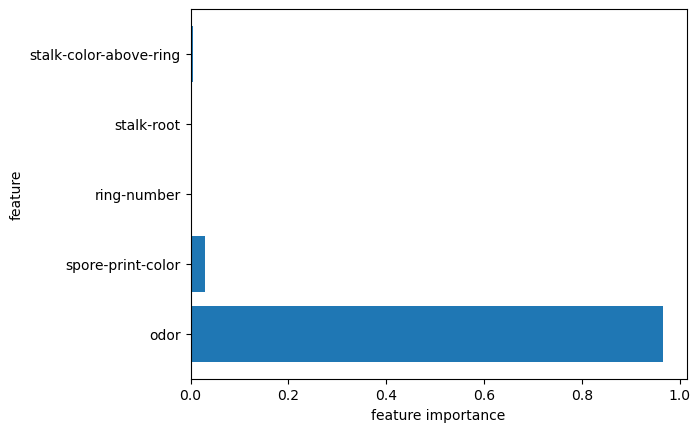

In [34]:
plt.barh(range(best_dtc.n_features_in_), best_dtc.feature_importances_, align='center')
plt.yticks(np.arange(best_dtc.n_features_in_), best_dtc.feature_names_in_)
plt.xlabel("feature importance")
plt.ylabel("feature")
plt.show()

In [35]:
best_dtc_train_score = best_dtc.score(best_X_train, y_train)
best_dtc_test_score = best_dtc.score(best_X_test, y_test)

print(f"best desion classifier train score: {best_dtc_train_score*100:.2f} %")
print(f"best desion classifier test score: {best_dtc_test_score*100:.2f} %")
print(f"|train - test|: {abs(best_dtc_test_score-best_dtc_train_score)*100:.2f} %")

best desion classifier train score: 99.53 %
best desion classifier test score: 99.47 %
|train - test|: 0.06 %


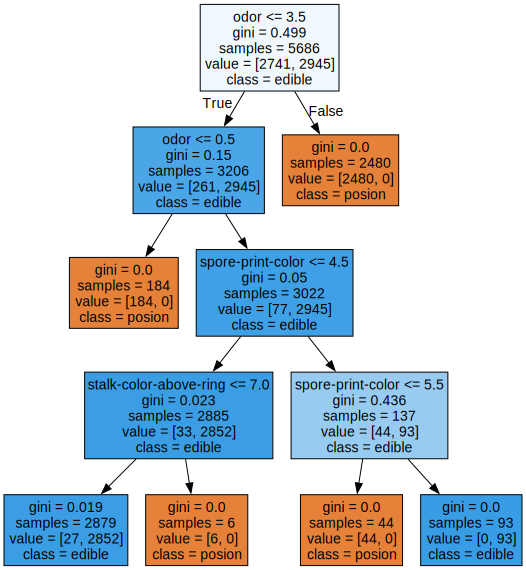

In [36]:
export_graphviz(best_dtc, out_file='../data/best_dtc_mushroom_tree.dot', class_names=['posion', 'edible'],
                feature_names=best_dtc.feature_names_in_, impurity=True, filled=True)

with open('../data/best_dtc_mushroom_tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

- Logistic regression
    - label: class
    - feature: finded decision tree best_feature
    - scaling: Standard scaling, Quantile Transformer
    - encoding: True, label encodig
    - 
    - learning algorithm: linear logistic regression, if need, multi logistic regression
    - hyperparameter: default

In [37]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.linear_model import LogisticRegression

- standard scaling

In [38]:
sd_scaler = StandardScaler()
sd_scaler.fit(best_X_train, y_train)

StandardScaler()

In [39]:
sd_best_X_train = sd_scaler.transform(best_X_train)
sd_best_X_test = sd_scaler.transform(best_X_test)

- quantile transformer

In [40]:
qt_scaler = QuantileTransformer()
qt_scaler.fit(best_X_train, y_train)

QuantileTransformer()

In [41]:
qt_best_X_train = qt_scaler.transform(best_X_train)
qt_best_X_test = qt_scaler.transform(best_X_test)

In [42]:
sd_logit = LogisticRegression()
sd_logit.fit(sd_best_X_train, y_train)

LogisticRegression()

In [43]:
qt_logit = LogisticRegression()
qt_logit.fit(qt_best_X_train, y_train)

LogisticRegression()

In [44]:
sd_gradient = sd_logit.coef_[0]
sd_bais = sd_logit.intercept_[0]

qt_gradient = qt_logit.coef_[0]
qt_bais = qt_logit.intercept_[0]

print(f"standard logistic gradient: {sd_gradient}")
print(f"standard logistic bais: {sd_bais}\n")
print(f"quantile logistic gradient: {qt_gradient}")
print(f"quantile logistc bais: {qt_bais}")

standard logistic gradient: [-1.54961605 -1.98208411  0.85684673  0.87129592  0.22555792]
standard logistic bais: 0.04263278657115478

quantile logistic gradient: [-8.46019618 -4.86622158  2.05198314  2.68540734  0.38665332]
quantile logistc bais: 4.93659271126327


In [45]:
sd_train_score = sd_logit.score(sd_best_X_train, y_train)
sd_test_score = sd_logit.score(sd_best_X_test, y_test)

qt_train_score = qt_logit.score(qt_best_X_train, y_train)
qt_test_score = qt_logit.score(qt_best_X_test, y_test)

print(f"standard logistic train score: {sd_train_score*100:.2f} %")
print(f"standard logistic test score: {sd_test_score*100:.2f} %\n")
print(f"quantile logistic train score: {qt_train_score*100:.2f} %")
print(f"quantile logistic test score: {qt_test_score*100:.2f} %")

standard logistic train score: 93.48 %
standard logistic test score: 92.90 %

quantile logistic train score: 95.01 %
quantile logistic test score: 94.91 %


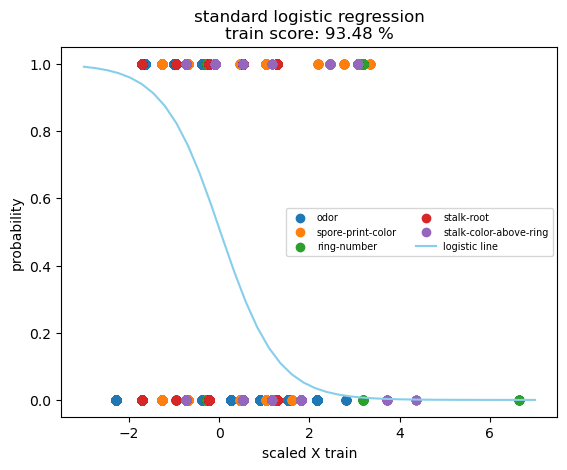

In [46]:
# Standard scaling
label_list = ['odor', 'spore-print-color', 'ring-number', 'stalk-root', 'stalk-color-above-ring']
for i in range(len(label_list)):
    plt.scatter(sd_best_X_train[:, i], y_train, label=label_list[i])
    
x = np.linspace(-3, 7, 40)
carry = 0
for i in sd_gradient:
    carry = carry + i*x
y = 1 / (1 + np.exp(-sd_bais -carry))
plt.plot(x, y, color='skyblue', label='logistic line')

plt.title(f'standard logistic regression\ntrain score: {sd_train_score*100:.2f} %')
plt.xlabel('scaled X train')
plt.ylabel('probability')
plt.legend(fontsize='x-small', ncol=2)
plt.show()

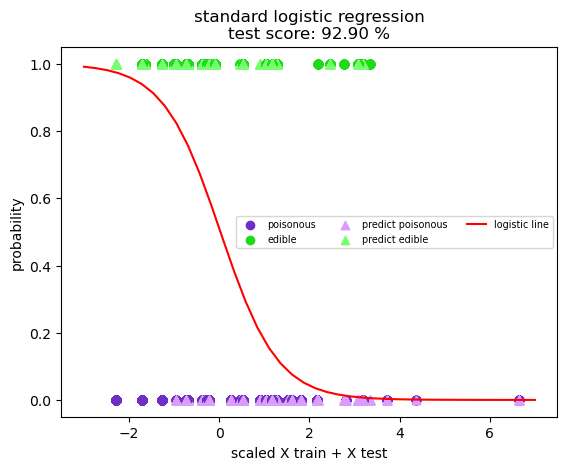

In [47]:
# Standard scaling
label_list = ['odor', 'spore-print-color', 'ring-number', 'stalk-root', 'stalk-color-above-ring']

re_y_train = y_train.reset_index(drop=True)
mask_p = re_y_train == 0
mask_e = re_y_train == 1

sd_pred = sd_logit.predict(sd_best_X_test)
mask_pp = sd_pred == 0
mask_pe = sd_pred == 1

for i in range(len(label_list)):
    if i == 0:
        plt.scatter(sd_best_X_train[mask_p, i], re_y_train[mask_p], color='#6E2FC7', label='poisonous')
        plt.scatter(sd_best_X_train[mask_e, i], re_y_train[mask_e], color='#1DDB16', label='edible')
        plt.scatter(sd_best_X_test[mask_pp, i], sd_pred[mask_pp], color='#DB9CFF', marker='^', label='predict poisonous')
        plt.scatter(sd_best_X_test[mask_pe, i], sd_pred[mask_pe], color='#77FF70', marker='^', label='predict edible')
    else:
        plt.scatter(sd_best_X_train[mask_p, i], re_y_train[mask_p], color='#6E2FC7')
        plt.scatter(sd_best_X_train[mask_e, i], re_y_train[mask_e], color='#1DDB16')
        plt.scatter(sd_best_X_test[mask_pp, i], sd_pred[mask_pp], color='#DB9CFF', marker='^')
        plt.scatter(sd_best_X_test[mask_pe, i], sd_pred[mask_pe], color='#77FF70', marker='^')
    
    
x = np.linspace(-3, 7, 40)
carry = 0
for i in sd_gradient:
    carry = carry + i*x
y = 1 / (1 + np.exp(-sd_bais -carry))
plt.plot(x, y, color='red', label='logistic line')

plt.title(f'standard logistic regression\ntest score: {sd_test_score*100:.2f} %')
plt.xlabel('scaled X train + X test')
plt.ylabel('probability')
plt.legend(fontsize='x-small', ncol=3)
plt.show()

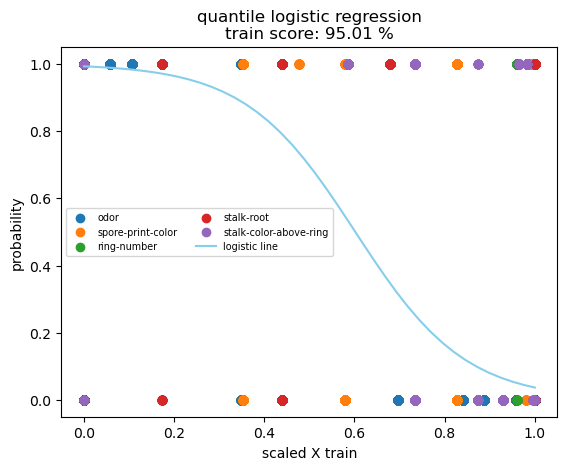

In [48]:
# Quantile Transformer
label_list = ['odor', 'spore-print-color', 'ring-number', 'stalk-root', 'stalk-color-above-ring']
for i in range(len(label_list)):
    plt.scatter(qt_best_X_train[:, i], y_train, label=label_list[i])
    
x = np.linspace(0, 1, 40)
carry = 0
for i in qt_gradient:
    carry = carry + i*x
y = 1 / (1 + np.exp(-qt_bais -carry))
plt.plot(x, y, color='skyblue', label='logistic line')

plt.title(f'quantile logistic regression\ntrain score: {qt_train_score*100:.2f} %')
plt.xlabel('scaled X train')
plt.ylabel('probability')
plt.legend(fontsize='x-small', ncol=2)
plt.show()

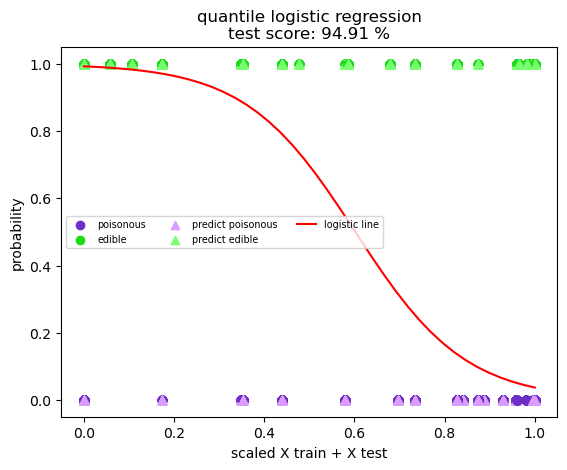

In [49]:
# Quantile Transformer
label_list = ['odor', 'spore-print-color', 'ring-number', 'stalk-root', 'stalk-color-above-ring']
# re_y_train = y_train.reset_index(drop=True)
# mask_p = re_y_train == 0
# mask_e = re_y_train == 1

qt_pred = qt_logit.predict(qt_best_X_test)
mask_pp = qt_pred == 0
mask_pe = qt_pred == 1

for i in range(len(label_list)):
    if i == 0:
        plt.scatter(qt_best_X_train[mask_p, i], re_y_train[mask_p], color='#6E2FC7', label='poisonous')
        plt.scatter(qt_best_X_train[mask_e, i], re_y_train[mask_e], color='#1DDB16', label='edible')
        plt.scatter(qt_best_X_test[mask_pp, i], qt_pred[mask_pp], color='#DB9CFF', marker='^', label='predict poisonous')
        plt.scatter(qt_best_X_test[mask_pe, i], qt_pred[mask_pe], color='#77FF70', marker='^', label='predict edible')
    else:
        plt.scatter(qt_best_X_train[mask_p, i], re_y_train[mask_p], color='#6E2FC7')
        plt.scatter(qt_best_X_train[mask_e, i], re_y_train[mask_e], color='#1DDB16')
        plt.scatter(qt_best_X_test[mask_pp, i], qt_pred[mask_pp], color='#DB9CFF', marker='^')
        plt.scatter(qt_best_X_test[mask_pe, i], qt_pred[mask_pe], color='#77FF70', marker='^')
    
    
x = np.linspace(0, 1, 40)
carry = 0
for i in qt_gradient:
    carry = carry + i*x
y = 1 / (1 + np.exp(-qt_bais -carry))
plt.plot(x, y, color='red', label='logistic line')

plt.title(f'quantile logistic regression\ntest score: {qt_test_score*100:.2f} %')
plt.xlabel('scaled X train + X test')
plt.ylabel('probability')
plt.legend(fontsize='x-small', ncol=3, loc='center left')
plt.show()

- ensemble
    - algorithm: decision tree, logistic
    - feature: best_feature
    - label: class {0:'poisonous', 1:'edible'}
    - 
    - decison tree
        - hyperparmeter: max_depth=8, min_samples_split=8
    - logistic regression
        - scaling method: quantlie transformer
    - ensemble
        - learning method: supervised learning, classification
        - learning algorithm: voting
            - compare hard voting and soft voting

In [50]:
from sklearn.ensemble import VotingClassifier

In [51]:
dtc_model = DecisionTreeClassifier(max_depth=6, min_samples_split=8)
lg_model = LogisticRegression()

In [52]:
# voting instance
vh_model = VotingClassifier(estimators=[('dtc_model', dtc_model), ('lg_model', lg_model)],
                                voting='hard')

vs_model = VotingClassifier(estimators=[('dtc_model', dtc_model), ('lg_model', lg_model)],
                                voting='soft')

In [53]:
vh_model.fit(qt_best_X_train, y_train)

VotingClassifier(estimators=[('dtc_model',
                              DecisionTreeClassifier(max_depth=6,
                                                     min_samples_split=8)),
                             ('lg_model', LogisticRegression())])

In [54]:
vs_model.fit(qt_best_X_train, y_train)

VotingClassifier(estimators=[('dtc_model',
                              DecisionTreeClassifier(max_depth=6,
                                                     min_samples_split=8)),
                             ('lg_model', LogisticRegression())],
                 voting='soft')

In [55]:
vh_train_score = vh_model.score(qt_best_X_train, y_train)
vh_test_score = vh_model.score(qt_best_X_test, y_test)

vs_train_score = vs_model.score(qt_best_X_train, y_train)
vs_test_score = vs_model.score(qt_best_X_test, y_test)

print('hard voting')
print(f"train score: {vh_train_score*100:.2f} %")
print(f"test score: {vh_test_score*100:.2f} %\n")
print('soft voting')
print(f"train score: {vs_train_score*100:.2f} %")
print(f"test score: {vs_test_score*100:.2f} %")

hard voting
train score: 99.02 %
test score: 99.02 %

soft voting
train score: 99.02 %
test score: 99.02 %


##### total comparison

In [56]:
# classification 이니까 갑자기 행렬을 찍어보고 싶어졌음 ㅋㅋㅋㅋㅋㅋ
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [57]:
dtc_pred = best_dtc.predict(best_X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)
dtc_prec = precision_score(y_test, dtc_pred)
dtc_rec = recall_score(y_test, dtc_pred)
dtc_mat = confusion_matrix(y_test, dtc_pred)

In [58]:
lg_pred = qt_logit.predict(qt_best_X_test)
lg_acc = accuracy_score(y_test.values, lg_pred)
lg_prec = precision_score(y_test.values, lg_pred)
lg_rec = recall_score(y_test.values, lg_pred)
lg_mat = confusion_matrix(y_test.values, lg_pred)

In [59]:
vh_pred = vs_model.predict(qt_best_X_test)
vh_acc = accuracy_score(y_test.values, vh_pred)
vh_prec = precision_score(y_test.values, vh_pred)
vh_rec = recall_score(y_test.values, vh_pred)
vh_mat = confusion_matrix(y_test.values, vh_pred)

In [60]:
print('[Decision Tree]')
print(f"Train Score : {best_dtc_train_score*100:.2f} %")
print(f"Test Score  : {best_dtc_test_score*100:.2f} %")
print(f"Accuracy    : {dtc_acc*100:.2f} %")
print(f"Precision   : {dtc_prec*100:.2f} %")
print(f"Recall      : {dtc_rec*100:.2f} %")
print(f'Confusion Matrix\n{dtc_mat}\n')

print('[Logistic Regression]')
print(f"Train Score : {qt_train_score*100:.2f} %")
print(f"Test Score  : {qt_test_score*100:.2f} %")
print(f"Accuracy    : {lg_acc*100:.2f} %")
print(f"Precision   : {lg_prec*100:.2f} %")
print(f"Recall      : {lg_rec*100:.2f} %")
print(f'Confusion Matrix\n{lg_mat}\n')

print('[Ansemble Voting]')
print(f"Train Score : {vh_train_score*100:.2f} %")
print(f"Test Score  : {vh_test_score*100:.2f} %")
print(f"Accuracy    : {vh_acc*100:.2f} %")
print(f"Precision   : {vh_prec*100:.2f} %")
print(f"Recall      : {vh_rec*100:.2f} %")
print('Confusion Matrix', vh_mat, sep='\n')

[Decision Tree]
Train Score : 99.53 %
Test Score  : 99.47 %
Accuracy    : 99.47 %
Precision   : 98.98 %
Recall      : 100.00 %
Confusion Matrix
[[1162   13]
 [   0 1263]]

[Logistic Regression]
Train Score : 95.01 %
Test Score  : 94.91 %
Accuracy    : 94.91 %
Precision   : 91.91 %
Recall      : 98.89 %
Confusion Matrix
[[1065  110]
 [  14 1249]]

[Ansemble Voting]
Train Score : 99.02 %
Test Score  : 99.02 %
Accuracy    : 99.02 %
Precision   : 99.21 %
Recall      : 98.89 %
Confusion Matrix
[[1165   10]
 [  14 1249]]


- Ensemble voting model과 Decision tree의 결과가 동일. 했었음.
    - Ensemble은 max_depth를 8로 늘여줬음. 그랬더니 성능 좋아짐.
- 
- 확실히 model이 2개지만 최적을 찾아서 ensemble하니까 성능이 좋아졌음
    - 99%로 나오니까 over-fitting을 생각 안 할 수는 없음...